In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/spectrograms'

In [ ]:
#necessary libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
img_path = '/content/drive/MyDrive/spectrograms/0/13230-0-0-1.png'
img_src = cv2.imread(img_path)
print(img_src)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  3   0   0]
  [  3   0   0]
  [  3   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [  4   0   0]
  [  4   0   0]
  [  4   0   0]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


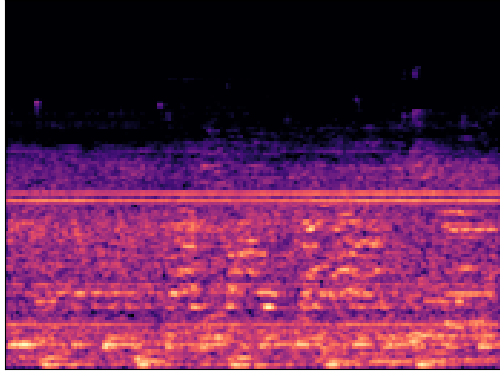

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_src)

In [ ]:
img_src.shape

(374, 500, 3)

In [ ]:
#resize just an image
a = cv2.resize(img_src,(255,255))

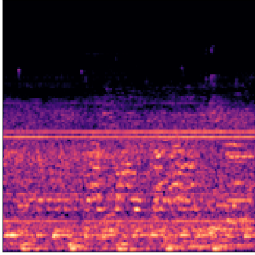

In [ ]:
cv2_imshow(a)

In [ ]:
classes = {
0 : "air_conditioner",
1 : "car_horn",
2 : "children_playing",
3 : "dog_bark",
4 : "drilling",
5 : "engine_idling",
6 : "gun_shot",
7 : "jackhammer",
8 : "siren",
9 : "street_music"
}

categories = list(classes.keys())
print(categories)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
#grayscale and resizing
images = []
for category in categories:
    max_img_number = 0
    index = categories.index(category)
    for image in os.listdir(f"{path}/{category}"):
        if max_img_number == 1000:
            break
        img_path = f"{path}/{category}/{image}"
        try:
            img = cv2.imread(img_path,cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img,(128,128))
            img = img/255   
            images.append([index,img])
            max_img_number += 1
        except Exception as e:
            print(e)
            pass

In [ ]:
X = []
y = []
y = [i[0] for i in images]
X = [i[1] for i in images]

In [ ]:
# Create X_train, y_train and X_temporary and y_temporary datasets from X and y.
X_train, X_temporary, y_train, y_temporary = train_test_split(X, y, train_size=0.8)

# Using the X_temporary and y_temporary dataset we just created create validaiton and test datasets.
X_val, X_test, y_val, y_test = train_test_split(X_temporary, y_temporary, train_size=0.5)

In [ ]:
# Print the lengths of the X, X_train, X_val and X_test
print(f'Length of the dataset : {len(images)}')
print(f'Length of the training dataset : {len(X_train)}')
print(f'Length of the validation dataset : {len(X_val)}')
print(f'Length of the test dataset : {len(X_test)}')

Length of the dataset : 8732
Length of the training dataset : 6985
Length of the validation dataset : 873
Length of the test dataset : 874


In [ ]:
#save the datasets
np.save('/content/drive/MyDrive/UrbanSoundsDatasets/X_train.npy',X_train)
np.save("/content/drive/MyDrive/UrbanSoundsDatasets/y_train.npy",y_train)
np.save("/content/drive/MyDrive/UrbanSoundsDatasets/X_val.npy",X_val)
np.save("/content/drive/MyDrive/UrbanSoundsDatasets/y_val.npy",y_val)
np.save("/content/drive/MyDrive/UrbanSoundsDatasets/X_test.npy",X_test)
np.save("/content/drive/MyDrive/UrbanSoundsDatasets/y_test.npy",y_test)